In [22]:
import nltk
from nltk.corpus import gutenberg
import string
import matplotlib.pyplot as plt

In [2]:
#List of NLTK included text
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
#Choose Moby Dick by Herman Melville 
moby_raw = nltk.corpus.gutenberg.raw('melville-moby_dick.txt')

#Look at at the first 1,000 characters
print(moby_raw[:1000])

[Moby Dick by Herman Melville 1851]


ETYMOLOGY.

(Supplied by a Late Consumptive Usher to a Grammar School)

The pale Usher--threadbare in coat, heart, body, and brain; I see him
now.  He was ever dusting his old lexicons and grammars, with a queer
handkerchief, mockingly embellished with all the gay flags of all the
known nations of the world.  He loved to dust his old grammars; it
somehow mildly reminded him of his mortality.

"While you take in hand to school others, and to teach them by what
name a whale-fish is to be called in our tongue leaving out, through
ignorance, the letter H, which almost alone maketh the signification
of the word, you deliver that which is not true." --HACKLUYT

"WHALE. ... Sw. and Dan. HVAL.  This animal is named from roundness
or rolling; for in Dan. HVALT is arched or vaulted." --WEBSTER'S
DICTIONARY

"WHALE. ... It is more immediately from the Dut. and Ger. WALLEN;
A.S. WALW-IAN, to roll, to wallow." --RICHARDSON'S DICTIONARY



Project Gutenberg contains a header with the name of the text, the author, the names of people who scanned and corrected the text, a license, and so on. Let's remove all of the extraneuous information to only have the main text of Moby Dick.

In [4]:
#Find the beginning of chapter 1 and end of book
len(moby_raw), moby_raw.find('Loomings'), moby_raw.rfind('orphan.')

(1242990, 21958, 1242979)

In [5]:
#Slice to chapter 1 and include the epilogue
moby_raw_filtered = moby_raw[21945:1242986]
print("BEGINNING \n" + '-'*40 + '\n' + moby_raw_filtered[:1000] + "\n"*2 + "END \n" + '-'*40 + moby_raw_filtered[-1550:])

BEGINNING 
----------------------------------------
CHAPTER 1

Loomings.


Call me Ishmael.  Some years ago--never mind how long
precisely--having little or no money in my purse, and nothing
particular to interest me on shore, I thought I would sail about a
little and see the watery part of the world.  It is a way I have of
driving off the spleen and regulating the circulation.  Whenever I
find myself growing grim about the mouth; whenever it is a damp,
drizzly November in my soul; whenever I find myself involuntarily
pausing before coffin warehouses, and bringing up the rear of every
funeral I meet; and especially whenever my hypos get such an upper
hand of me, that it requires a strong moral principle to prevent me
from deliberately stepping into the street, and methodically knocking
people's hats off--then, I account it high time to get to sea as soon
as I can.  This is my substitute for pistol and ball.  With a
philosophical flourish Cato throws himself upon his sword; I quietly
ta

In [6]:
#Tokenize and text Moby Dick
moby_token = nltk.word_tokenize(moby_raw_filtered)
moby_text = nltk.Text(moby_token)

#Check any collocations which can give an idea of themes
moby_text.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; Mr. Starbuck; New Bedford; Cape
Horn; 'ye see; cried Ahab; years ago; lower jaw; white whale; Mrs.
Hussey; chief mate; never mind; Father Mapple


In [94]:
#Create a word frequency distribution and look at 10 most common tokens
nltk.FreqDist(moby_text).most_common(10)

[(',', 18923),
 ('the', 13522),
 ('.', 7064),
 ('of', 6402),
 ('and', 5931),
 ('a', 4465),
 ('to', 4444),
 (';', 4143),
 ('in', 3830),
 ('that', 2939)]

The text contains a lot of stopwords and punctuation, the block below will remove them.

In [55]:
#Remove punctuation and stopwords
stop_words = nltk.corpus.stopwords.words('english') + list(string.punctuation)
stop_words.extend(('--',"''",'``',"'s"))
moby_filtered = [word for word in moby_text if word.lower() not in stop_words]
word_freq = nltk.FreqDist(moby_filtered)
word_freq.most_common(10)

[('one', 869),
 ('whale', 743),
 ('like', 552),
 ('upon', 532),
 ('Ahab', 498),
 ('man', 470),
 ('ship', 450),
 ('old', 426),
 ('ye', 422),
 ('would', 420)]

Can iterate to see what percent of total text each of these tokens takes up. The top 10 most common words don't account for a large percentage of the text and Moby Dick doesn't appear to follow Zipf's law. This implies a high lexical diversity.

In [83]:
#Function to plot the token, frequency and percent of total for a given text. Defaults to top 10 tokens and Moby Dick
def freq_table(cdistfreq,number=10,text=moby_filtered):
    print("\n{:^10} | {:^6} | {:^6}".format("Token", "Count", "Percent of Text"))
    print("*"*40)
    for item in cdistfreq.most_common(number):
        print("{:10} | {:>6} | {:>6}".format(item[0],item[1],round(100 * item[1]/len(text),3)))

freq_table(word_freq)


  Token    | Count  | Percent of Text
****************************************
one        |    869 |  0.812
whale      |    743 |  0.695
like       |    552 |  0.516
upon       |    532 |  0.497
Ahab       |    498 |  0.466
man        |    470 |  0.439
ship       |    450 |  0.421
old        |    426 |  0.398
ye         |    422 |  0.395
would      |    420 |  0.393


Can also look at the lexical diversity of the text which is a measure of uniqueness for the text. For Moby Dick the diversity is around 18%, meaning that 18% of the tokenized text is distinct or that on average each word is used about 6 times.

In [84]:
#Return the lexical diversity
def lexical_diversity(text):
    return (len(set(text)) / len(text)) * 100
lexical_diversity(moby_filtered)

18.63997980723387

Using a dispersion plot can show when certain elements appear in the text and how frequently. With the plot below, we can see that Ahab and Peleg don't appear until around 14% through the text and Father Mapple appears early but not again. The term whale and ship appear frequently throughout the length of the text.

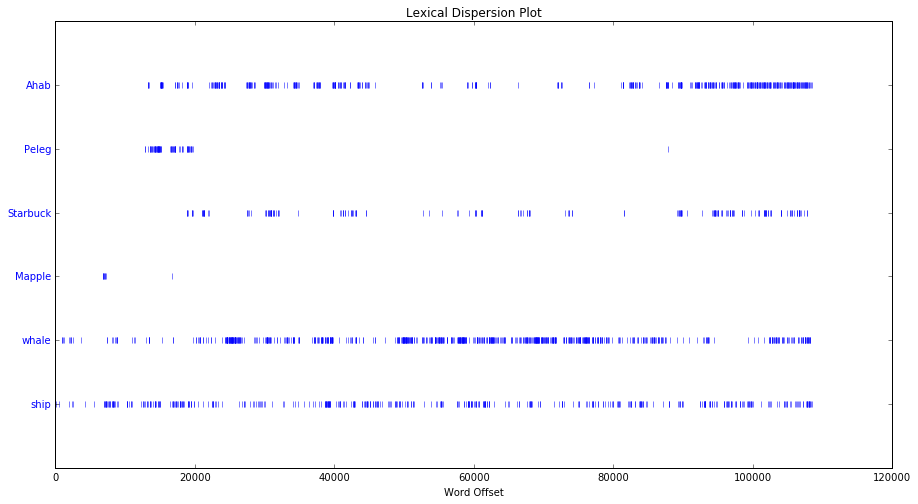

In [27]:
#Create a dispersion plot for a specific set of tokens
%matplotlib inline
plt.figure(figsize=(15, 8))
nltk.draw.dispersion.dispersion_plot(moby_filtered, ["Ahab","Peleg","Starbuck","Mapple","whale","ship"])

In [50]:
#Create function that returns the first and last instances of a token as a percentage of the total text
def first_last_instances(token, text):
    for toke in token:
        print(toke + " first appears " + str(round((text.find(toke) / len(text)) * 100, 2)) + 
              " percent through the text and last appears " + str(round((text.rfind(toke) / len(text)) * 100, 2)))

first_last_instances(["Ahab","Peleg","Starbuck","Mapple","whale","ship"], moby_raw)

Ahab first appears 13.93 percent through the text and last appears 99.9
Peleg first appears 13.54 percent through the text and last appears 82.1
Starbuck first appears 18.87 percent through the text and last appears 99.38
Mapple first appears 8.04 percent through the text and last appears 17.01
whale first appears 0.04 percent through the text and last appears 99.67
ship first appears 0.28 percent through the text and last appears 99.92


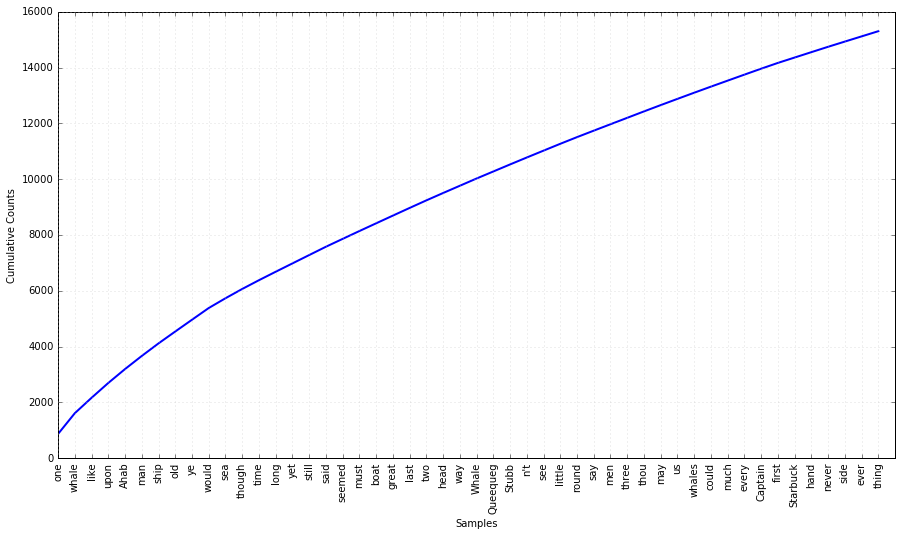

In [93]:
plt.figure(figsize=(15, 8))
word_freq.plot(50, cumulative=True)